In [109]:
import requests
import pprint
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
import shapefile as shp
import plotly.express as px

from api_keys import greater_schools_api_key


In [6]:
#parameters of the search- for practice prior to adding in csv.

city = "atlanta"
state = 'ga'
value = 10
level = 'h' #Valid values: e, m,h
school_type = "private" # Valid values: "public", "charter", "private"
limit = 50 #max 50

headers = {
  'X-API-Key': greater_schools_api_key
}


In [7]:
zipcodes_school = []

#read in the zipcode 
with open('output-data/zipcodes.csv','r') as csv_file:
    zipcodes_csv = csv.reader(csv_file, delimiter=',')
    #loop through the zipcode csv and find the schools associated with that.
    line_count = 0
    for row in zipcodes_csv:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1

        else:
            print(row)
            zipcode = int(row[1])
            url = f'https://gs-api.greatschools.org/schools?zip={zipcode}&limit={limit}&value={value}level_codes={level}'
            response = requests.request("GET", url, headers=headers)
            schools = response.json()
            zipcodes_school.append(schools)
            #print(row[1])
            #print(schools)
            
            line_count += 1

        print(f'Processed {line_count} lines.')



Column names are Zipcode, Zipcode, City, State, Distance from Origin
Processed 1 lines.
['0', '30303', 'Atlanta', 'GA', '0.0']
Processed 2 lines.
['1', '30302', 'Atlanta', 'GA', '0.25']
Processed 3 lines.
['2', '30321', 'Atlanta', 'GA', '0.25']
Processed 4 lines.
['3', '30343', 'Atlanta', 'GA', '0.25']
Processed 5 lines.
['4', '30353', 'Atlanta', 'GA', '0.25']
Processed 6 lines.
['5', '30358', 'Atlanta', 'GA', '0.25']
Processed 7 lines.
['6', '30370', 'Atlanta', 'GA', '0.25']
Processed 8 lines.
['7', '30374', 'Atlanta', 'GA', '0.25']
Processed 9 lines.
['8', '30392', 'Atlanta', 'GA', '0.25']
Processed 10 lines.
['9', '30394', 'Atlanta', 'GA', '0.25']
Processed 11 lines.
['10', '30334', 'Atlanta', 'GA', '0.27']
Processed 12 lines.
['11', '31136', 'Atlanta', 'GA', '0.51']
Processed 13 lines.
['12', '30312', 'Atlanta', 'GA', '0.73']
Processed 14 lines.
['13', '30313', 'Atlanta', 'GA', '1.12']
Processed 15 lines.
['14', '30308', 'Atlanta', 'GA', '1.53']
Processed 16 lines.
['15', '30332', 

In [3]:
#pprint.pprint(zipcodes_school)

In [8]:
zipcodes_school[0]
len(zipcodes_school)

schools_in_zipcode = []
for s in zipcodes_school:
    if s['schools']== []:
        pass
    else:
        schools_in_zipcode.append(s)

pprint.pprint(schools_in_zipcode)

[{'schools': [{'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 206,
               'district-name': 'Department Of Human Resources',
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.753963,
               'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
               'level-codes': 'p,e,m,h',
               'lon': -84.390221,
               'name': 'Department Of Human Resources',
               'nces-id': '130002703682',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/6754-Department-Of-Human-Resources/',
               'phone': '(404) 657-0435',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture 

               'zip': '30314'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': '(404) 755-5655',
               'fipscounty': 13121,
               'lat': 33.748775,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.421616,
               'name': 'M. A. Jones Elementary School',
               'nces-id': '130012000085',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/74-M.-A.-Jones-Elementary-School/',
               'phone': '(404) 802-3900',
               'rating': '4',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpf

                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Kipp Strive Academy, a charter sch

               'county': 'DeKalb',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.78413,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.38958,
               'name': 'The Goddard School - Atlanta (Midtown)',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8684-The-Goddard-School---Atlanta-Midtown/',
               'phone': '(404) 541-1936',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
          

               'nces-id': 'A9901515',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2378-Nur-Academy/',
               'phone': '(404) 688-8830',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
           

                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Maynard H. Jackson- Jr. High School, a '
                                 'public school located in Atlanta, GA, serves '
                                 'grades 9-12 in the Atlanta Public Schools.It '
                                 'has received a GreatSchools Ratin

               'year': None,
               'zip': '30316'},
              {'city': 'Atlanta',
               'county': 'Dekalb County',
               'district-id': 55,
               'district-name': 'Dekalb County School District',
               'fax': '(678) 874-4910',
               'fipscounty': 13089,
               'lat': 33.703907,
               'level': '9,10,11,12',
               'level-codes': 'h',
               'lon': -84.325111,
               'name': 'Mcnair High School',
               'nces-id': '130174000712',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/762-Mcnair-High-School/',
               'phone': '(678) 874-4902',
               'rating': '2',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provide

                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider famil

               'web-site': None,
               'year': None,
               'zip': '30317'}]},
 {'schools': [{'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.80143,
               'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10',
               'level-codes': 'p,e,m,h',
               'lon': -84.367943,
               'name': 'Heritage Preparatory School',
               'nces-id': 'A0301218',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/3535-Heritage-Preparatory-School/',
               'phone': '(404) 815-7711',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                 

              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': '(404) 505-6518',
               'fipscounty': 13121,
               'lat': 33.748817,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.478783,
               'name': 'Peyton Forest Elementary School',
               'nces-id': '130012000106',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/86-Peyton-Forest-Elementary-School/',
               'phone': '(404) 802-7100',
               'rating': '4',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
        

               'state-id': '7612569',
               'street': '570 Lynhurst Drive Southwest',
               'type': 'public',
               'universal-id': '1300097',
               'web-site': 'http://www.apskids.org/westmanor/',
               'year': 2022,
               'zip': '30311'}]},
 {'schools': [{'city': 'East Point',
               'county': 'Fulton County',
               'district-id': 73,
               'district-name': 'Fulton County School District',
               'fax': '(404) 669-8230',
               'fipscounty': 13121,
               'lat': 33.66449,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.478828,
               'name': 'Mount Olive Elementary School',
               'nces-id': '130228001036',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/1007-Mount-Olive-Elementary-School/',
               'phone': '(470) 254-8050',
               'rating': '4',
               'ra

               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/east-point/6669-Osby-Christian-Academy/',
               'phone': '(404) 767-6729',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
   

               'street': '443 East Paces Ferry Road Northeast',
               'type': 'private',
               'universal-id': '1306876',
               'web-site': 'http://www.suzukischool.com/',
               'year': None,
               'zip': '30305'},
              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.821388,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.387947,
               'name': 'The Spanish Academy',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8524-The-Spanish-Academy/',
               'phone': '(770) 751-3646',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a st

               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school perfor

               'fipscounty': 13121,
               'lat': 33.671005,
               'level': '9,10,11,12',
               'level-codes': 'h',
               'lon': -84.361679,
               'name': 'South Atlanta High School',
               'nces-id': '130012004240',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8765-South-Atlanta-High-School/',
               'phone': '(404) 802-5050',
               'rating': '4',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above avera

               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.822807,
               'level': 'PK,KG,1,2,3,4,5,6,7,8',
               'level-codes': 'p,e,m',
               'lon': -84.318237,
               'name': 'Still Waters Learning Center',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8724-Still-Waters-Learning-Center/',
               'phone': '(770) 449-4125',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its s

                                 'Dekalb County School District.It has '
                                 'received a GreatSchools Rating of 1 out of '
                                 '10, based on a variety of school quality '
                                 'measures.',
               'state': 'GA',
               'state-id': '6440409',
               'street': '2162 2nd Avenue',
               'type': 'public',
               'universal-id': '1306363',
               'web-site': None,
               'year': 2022,
               'zip': '30032'},
              {'city': 'Decatur',
               'county': 'DeKalb',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.73468,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.235046,
               'name': 'All Gods Children Academy',
               'nces-id': 'A0970728',
              

               'name': 'International Community School',
               'nces-id': '130174002538',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/2742-International-Community-School/',
               'phone': '(404) 499-8969',
               'rating': '6',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
    

                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'The Goddard School - Decatur, a private '
                                 'school located in Decatur, GA, serve

               'district-name': None,
               'fax': '(404) 843-9815',
               'fipscounty': 13121,
               'lat': 33.912098,
               'level': 'PK,TK,KG,1,2,3,4,5,6,7,8',
               'level-codes': 'p,e,m',
               'lon': -84.392868,
               'name': 'Springmont School in Atlanta',
               'nces-id': '02022055',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2045-Springmont-School-In-Atlanta/',
               'phone': '(404) 252-3910',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Rat

                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Ahava Early Learning Center, a private '
                                 'school located in Atlanta, GA, serves grades '
                                 'PK-K in the .',
               'state': 'GA',
               'state-id': None,
               'street': '600 Peachtree Battle Ave.',
               'type': 'private',
               'universal-i

               'street': '1591 Fairburn Road SW',
               'type': 'private',
               'universal-id': '1303973',
               'web-site': None,
               'year': None,
               'zip': '30331'},
              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.697819,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.510452,
               'name': 'Ben Hill Umc Christian Academy',
               'nces-id': 'A0501395',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/3982-Ben-Hill-Umc-Christian-Academy/',
               'phone': '(404) 344-8912',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on

                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Adamsville Primary School, a public school '
                                 'located in Atlanta, GA, serves grades PK-2 '
                                 'in the Atlanta Public Schools.',
               'state': 'GA',
               'state-id': '7610413',
               'street': '286 Wilson Mill Road Southwest',
               'type': 'public',
               'universal-id': '1308476',
               'web-site': None,
 

               'overview-url': 'https://www.greatschools.org/georgia/conley/8864-ACT/',
               'phone': '(404) 549-2327',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We 

              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.653847,
               'level': 'PK,KG,1,2,3,4',
               'level-codes': 'p,e',
               'lon': -84.44873,
               'name': 'Atlanta Montessori Academy',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2572-Atlanta-Montessori-Academy/',
               'phone': '(404) 768-5700',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serve

                                     'part of the school selection process.',
               'school-summary': 'Oakview Elementary School, a public school '
                                 'located in Decatur, GA, serves grades PK-5 '
                                 'in the Dekalb County School District.It has '
                                 'received a GreatSchools Rating of 2 out of '
                                 '10, based on a variety of school quality '
                                 'measures.',
               'state': 'GA',
               'state-id': '6440305',
               'street': '3574 Oakvale Road',
               'type': 'public',
               'universal-id': '1303686',
               'web-site': None,
               'year': 2022,
               'zip': '30034'},
              {'city': 'Decatur',
               'county': 'Dekalb',
               'district-id': 0,
               'district-name': None,
               'fax': '(404) 207-1352',
               'fip

               'lat': 33.836769,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.288567,
               'name': 'Oak Grove Elementary School',
               'nces-id': '130174000714',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/764-Oak-Grove-Elementary-School/',
               'phone': '(678) 874-7402',
               'rating': '7',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                    

                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Little Da Vinci International School, a '
                                 'private school located in Atlanta, GA, '
                                 'serves grades PK-2 in the .',
               'state': 'GA',
               'state-id': None,
               'street': '4100 Roswell Rd',
               'type': 'private',
               'universal-id': '1308630',
               'web-site': 'http://dvischool.com/',
               'year': None,
               'zip': '30342'},
              {'city': 'Alpha

In [9]:
#loop through the dictionaries and lists to get to the specific values.
specific_schools = []

for schools in schools_in_zipcode:
    for key,value in schools.items():
        for s in value:
            specific_schools.append(s)

pprint.pprint(specific_schools)


[{'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 206,
  'district-name': 'Department Of Human Resources',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.753963,
  'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
  'level-codes': 'p,e,m,h',
  'lon': -84.390221,
  'name': 'Department Of Human Resources',
  'nces-id': '130002703682',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6754-Department-Of-Human-Resources/',
  'phone': '(404) 657-0435',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'read

  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'King Middle School, a public school located in Atlanta, '
                    'GA, ser

  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.760597,
  'level': '9,10,11,12',
  'level-codes': 'h',
  'lon': -84.382477,
  'name': 'Cristo Rey Atlanta Jesuit High School',
  'nces-id': 'A1501259',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8900-Cristo-Rey-Atlanta-Jesuit-High-School/',
  'phone': '(404) 637-2800',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and a

  'phone': '(404) 802-3600',
  'rating': '3',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Michael R. Hollis Innovation Academy, a 

                    'has received a GreatSchools Rating of 7 out of 10, based '
                    'on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7610115',
  'street': '1444 Lucile Avenue Southwest',
  'type': 'charter',
  'universal-id': '1306441',
  'web-site': 'http://www.kippmetroatlanta.org/KIPP-STRIVE-Academy',
  'year': 2022,
  'zip': '30310'},
 {'city': 'Atlanta',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.711781,
  'level': 'KG',
  'level-codes': 'e',
  'lon': -84.4077,
  'name': 'Atlanta Technical College Early Education Center',
  'nces-id': 'A0970738',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8333-Atlanta-Technical-College-Early-Education-Center/',
  'phone': '(404) 225-4618',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality

  'overview-url': 'https://www.greatschools.org/georgia/atlanta/1971-The-Canterbury-School/',
  'phone': '(404) 876-5059',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
  

                    'has received a GreatSchools Rating of 7 out of 10, based '
                    'on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7614560',
  'street': '929 Charles Allen Drive Northeast',
  'type': 'public',
  'universal-id': '1300061',
  'web-site': 'http://www.gradyhighschool.org/',
  'year': 2022,
  'zip': '30309'},
 {'city': 'Atlanta',
  'county': 'DeKalb',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.78413,
  'level': 'PK,KG',
  'level-codes': 'p,e',
  'lon': -84.38958,
  'name': 'The Goddard School - Atlanta (Midtown)',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8684-The-Goddard-School---Atlanta-Midtown/',
  'phone': '(404) 541-1936',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators 

  'district-name': 'Dekalb County School District',
  'fax': '(678) 874-6310',
  'fipscounty': 13089,
  'lat': 33.793098,
  'level': '9,10,11,12',
  'level-codes': 'h',
  'lon': -84.315834,
  'name': 'Druid Hills High School',
  'nces-id': '130174000665',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/720-Druid-Hills-High-School/',
  'phone': '(678) 874-6302',
  'rating': '6',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendan

                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Aps-Forrest Hills Academey, a public school located in '
                    'Atlanta, GA, serves grades 6-12 in the Atlanta Public '
                    'Schools.',
  'state': 'GA',
  'state-id': '7610403',
  'street': '2930 Forrest Hills Drive Southwest',
  'type': 'public',
  'universal-id': '1302653',
  'web-site': N

  'district-name': 'Atlanta Public Schools',
  'fax': '(404) 624-2166',
  'fipscounty': 13121,
  'lat': 33.728142,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.382675,
  'name': 'Barack and Michelle Obama Academy',
  'nces-id': '130012000077',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/69-D.-H.-Stanton-Elementary-School/',
  'phone': '(404) 802-4200',
  'rating': '2',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discip

  'name': 'First Steps Christian Academy',
  'nces-id': '02021776',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/2036-First-Steps-Christian-Academy/',
  'phone': '(404) 241-7862',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
       

  'street': '1804 Bouldercrest Road',
  'type': 'public',
  'universal-id': '1300762',
  'web-site': None,
  'year': 2022,
  'zip': '30316'},
 {'city': 'Atlanta',
  'county': 'Dekalb County',
  'district-id': 55,
  'district-name': 'Dekalb County School District',
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.696815,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.301765,
  'name': 'Barack H. Obama Elementary Magnet School of Technology',
  'nces-id': '130174004248',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8764-Barack-H.-Obama-Elementary-Magnet-School-Of-Technology/',
  'phone': '(678) 874-4402',
  'rating': '3',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                 

  'state': 'GA',
  'state-id': None,
  'street': '401 Hamilton E Holmes Drive Northwest',
  'type': 'private',
  'universal-id': '1302985',
  'web-site': None,
  'year': None,
  'zip': '30318'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': '(404) 699-4569',
  'fipscounty': 13121,
  'lat': 33.772373,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.49379,
  'name': 'Bazoline E. Usher/Collier Heights Elmentary School',
  'nces-id': '130012003030',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/30-Bazoline-E.-Usher-Collier-Heights-Elmentary-School/',
  'phone': '(404) 802-5700',
  'rating': '3',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school s

                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Westside Atlanta Charter School, a charter school located '
                    'in Atlanta, GA, serves grades K-7 in the Atlanta Public '
                    'Schools.It has received a GreatSchools Rating of 5 out of '
                    '10, based on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7610314',
  'street': '1903 Drew Drive',
  'type': 'charter',
  'universal-id': '1308528',
  'web-site': 'www.wacs.us',
  'year': 2022,
  'zip': '30318'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.788624,
  'level': '6,7,8,9,10,11,12',
  'level-codes': 'm,h',
  'lon': -84.479691,
  'name': "Corretta Scott King Womens' Leadership Academy",
  'nces-id': '130012003980',
  'overview-url': 'https://www.greatschools

  'state': 'GA',
  'state-id': None,
  'street': '1192 Arkwright Place Southeast',
  'type': 'private',
  'universal-id': '1306262',
  'web-site': 'www.montessoriintown.com',
  'year': None,
  'zip': '30317'},
 {'city': 'Atlanta',
  'county': 'Dekalb County',
  'district-id': 228,
  'district-name': 'State Charter Schools- Ivy Prep Academy At Kirkwood For '
                   'Girls',
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.74617,
  'level': 'KG,1,2,3,4,5,6,7,8',
  'level-codes': 'e,m',
  'lon': -84.327484,
  'name': 'Ivy Preparatory Academy- Inc',
  'nces-id': '130022604023',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6647-Ivy-Prep-Academy-At-Kirkwood-For-Girls-School/',
  'phone': '(404) 622-2727',
  'rating': '4',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
      

  'rating': '6',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Briar Vista Elementary School, a public school located in '
         

  'zip': '30311'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': '(404) 752-0798',
  'fipscounty': 13121,
  'lat': 33.717186,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.465462,
  'name': 'Cascade Elementary School',
  'nces-id': '130012000092',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/78-Cascade-Elementary-School/',
  'phone': '(404) 802-8100',
  'rating': '1',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, aca

  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Tri-Cities High School, a public school located in East '
                    'Point, 

                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Mount Olive Early Learning Center, a private school '
                    'located in East Point, GA, serves grades PK-K in the .',
  'state': 'GA',
  'state-id': None,
  'street': '3366 Mount Olive Road',
  'type': 'private',
  'universal-id': '1303604',
  'web-site': None,
  'year': None,
  'zip': '30344'},
 {'city': '

                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Discovery Montessori Academy, a private school located in '
                    'Atlanta, GA, serves grades PK-K in the .',
  'state': 'GA',
  'state-id': None,
  'str

  'level-codes': 'e',
  'lon': -84.444496,
  'name': 'Resurgence Hall Charter School',
  'nces-id': '130024704283',
  'overview-url': 'https://www.greatschools.org/georgia/college-park/8770-Resurgence-Hall-Charter-School/',
  'phone': '(404) 382-8512',
  'rating': '10',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'informa

  'district-name': None,
  'fax': '(404) 841-3873',
  'fipscounty': 13121,
  'lat': 33.833084,
  'level': 'PK,TK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
  'level-codes': 'p,e,m,h',
  'lon': -84.378807,
  'name': 'Atlanta International School',
  'nces-id': 'A9303093',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/2156-Atlanta-International-School/',
  'phone': '(404) 841-3840',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline 

  'county': 'Dekalb County',
  'district-id': 53,
  'district-name': 'Decatur City School District',
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.776123,
  'level': 'PK,KG,1,2,3',
  'level-codes': 'p,e',
  'lon': -84.289803,
  'name': 'New Glennwood Elementary',
  'nces-id': '130168004028',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/6638-New-Glennwood-Elementary/',
  'phone': '(404) 370-4435',
  'rating': '8',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
             

                    'GA, serves grades 9-12 in the Decatur City School '
                    'District.It has received a GreatSchools Rating of 8 out '
                    'of 10, based on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7733050',
  'street': '310 North McDonough Street',
  'type': 'public',
  'universal-id': '1300682',
  'web-site': 'http://www.decatur-city.k12.ga.us',
  'year': 2022,
  'zip': '30030'},
 {'city': 'Decatur',
  'county': 'Dekalb County',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.771454,
  'level': '1,2,3,4,5,6,7,8',
  'level-codes': 'e,m',
  'lon': -84.28289,
  'name': 'The Ellis School of Atlanta',
  'nces-id': 'BB160833',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/9016-The-Ellis-School-Of-Atlanta/',
  'phone': '(678) 973-0483',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within

                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Long Middle School, a public school located in Atlanta, '
                    'GA, serves grades 6-8 in the Atlanta Public Schools.It '
                    'has received a GreatSchools Rating of 2 out of 10, based '
                    'on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7610173',


  'name': 'Ben Franklin Academy',
  'nces-id': 'A9303095',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/2157-Ben-Franklin-Academy/',
  'phone': '(404) 633-7404',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        '

  'phone': '(404) 565-2850',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Annunciation Day School, a private scho

  'overview-url': 'https://www.greatschools.org/georgia/decatur/708-Mcnair-Middle-School/',
  'phone': '(678) 874-5102',
  'rating': '3',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
     

  'fipscounty': 13089,
  'lat': 33.839111,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.26973,
  'name': 'Briarlake Elementary School',
  'nces-id': '130174000728',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/777-Briarlake-Elementary-School/',
  'phone': '(678) 874-2502',
  'rating': '7',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to vis

  'overview-url': 'https://www.greatschools.org/georgia/decatur/8857-21-Century-STEM-Academy/',
  'phone': '(404) 343-2447',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '


  'name': 'St Annes Day School',
  'nces-id': 'K9301818',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/2930-St-Annes-Day-School/',
  'phone': '(404) 237-7024',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'co

  'state': 'GA',
  'state-id': '7610304',
  'street': '3070 Fairburn Road Southwest',
  'type': 'public',
  'universal-id': '1303633',
  'web-site': None,
  'year': 2022,
  'zip': '30331'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 73,
  'district-name': 'Fulton County School District',
  'fax': '(404) 346-6510',
  'fipscounty': 13121,
  'lat': 33.699875,
  'level': '6,7,8',
  'level-codes': 'm',
  'lon': -84.561035,
  'name': 'Sandtown Middle School',
  'nces-id': '130228003368',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/3696-Sandtown-Middle-School/',
  'phone': '(470) 254-6500',
  'rating': '6',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings 

  'fax': '(404) 346-2358',
  'fipscounty': 13121,
  'lat': 33.697113,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.517265,
  'name': 'Fickett Elementary School',
  'nces-id': '130012000103',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/83-Fickett-Elementary-School/',
  'phone': '(404) 802-7850',
  'rating': '4',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                       

  'type': 'private',
  'universal-id': '1308875',
  'web-site': None,
  'year': None,
  'zip': '30331'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': '(404) 699-4579',
  'fipscounty': 13121,
  'lat': 33.758823,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.500595,
  'name': 'Fain Elementary School',
  'nces-id': '130012000110',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/89-Fain-Elementary-School/',
  'phone': '(404) 802-8600',
  'rating': '2',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average

 {'city': 'Bedford',
  'county': 'HILLSBOROUGH',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 33011,
  'lat': 43.193851,
  'level': 'PK,TK,KG',
  'level-codes': 'p,e',
  'lon': -71.572395,
  'name': 'New Morning School',
  'nces-id': 'A9707365',
  'overview-url': 'https://www.greatschools.org/new-hampshire/bedford/913-New-Morning-School/',
  'phone': '(603) 669-3591',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, 

                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Montgomery Elementary School, a public school located in '
                    'Brookhaven, GA, serves grades PK-5 in the Dekalb County '
                    'School District.It has received a GreatSchools Rating of '
                    '7 out of 10, based on a variety of school quality '
                    'measures.',
  'state': 'GA',
  'state-id': '6445062',
  'street': '3995 Ashford Dunwoody 

  'county': 'Fulton County',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.85524,
  'level': 'PK,TK,KG',
  'level-codes': 'p,e',
  'lon': -84.354225,
  'name': 'Peachtree Road Lutheran Preschool',
  'nces-id': 'A1301135',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8972-Peachtree-Road-Lutheran-Preschool/',
  'phone': '(404) 233-1658',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equi

  'school-summary': 'Cathedral Academy, a private school located in Decatur, '
                    'GA, serves grades PK-8 in the .',
  'state': 'GA',
  'state-id': None,
  'street': '4650 Flat Shoals Parkway',
  'type': 'private',
  'universal-id': '1302064',
  'web-site': 'http://www.cathedralacademy.net',
  'year': None,
  'zip': '30034'},
 {'city': 'Decatur',
  'county': 'DeKalb',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.706558,
  'level': 'PK,KG,1,2',
  'level-codes': 'p,e',
  'lon': -84.292824,
  'name': 'Creative Beginnings',
  'nces-id': 'A9102143',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/2075-Creative-Beginnings/',
  'phone': None,
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                   

                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Southwest Dekalb High School, a public school located in '
                    'Decatur, GA, serves grades 9-12 in the Dekalb County '
                    'School District.It has received a GreatSchools Rating of '
                    '4 out of 1

                        'process.',
  'school-summary': 'Lakeside High School, a public school located in Atlanta, '
                    'GA, serves grades 9-12 in the Dekalb County School '
                    'District.It has received a GreatSchools Rating of 5 out '
                    'of 10, based on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '6443060',
  'street': '3801 Briarcliff Road Northeast',
  'type': 'public',
  'universal-id': '1300770',
  'web-site': None,
  'year': 2022,
  'zip': '30345'},
 {'city': 'Atlanta',
  'county': 'Dekalb County',
  'district-id': 55,
  'district-name': 'Dekalb County School District',
  'fax': '(678) 874-3110',
  'fipscounty': 13089,
  'lat': 33.855488,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.259201,
  'name': 'Henderson Mill Elementary School',
  'nces-id': '130174000741',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/787-Henderson-Mill-Elementary-School/',
  'phone': '(6

 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.875198,
  'level': 'PK,TK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
  'level-codes': 'p,e,m,h',
  'lon': -84.393661,
  'name': 'The Galloway School',
  'nces-id': '00298387',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/1960-The-Galloway-School/',
  'phone': '(404) 252-8389',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
    

In [176]:
zipcode_schools_df = pd.DataFrame(specific_schools)
zipcode_schools_df['lat_lon'] = list(zip(zipcode_schools_df["lat"], zipcode_schools_df["lon"]))

zipcode_schools_df.head()

,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,city,...,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon
0,1306754,130002703682,8920198,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,Atlanta,...,33.753963,-84.390221,Department Of Human Resources,206,http://www.dhr.state.ga.us,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.753963, -84.390221)"
1,1306933,130023104095,78201190119,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,...,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.760502, -84.387169)"
2,1308742,130228004261,6601321,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,...,33.754742,-84.385574,Fulton County School District,73,None,https://www.greatschools.org/georgia/atlanta/8...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.754742, -84.385574)"
3,1309128,A1901569,None,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,...,33.749504,-84.392090,None,0,None,https://www.greatschools.org/georgia/atlanta/9...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749504, -84.39209)"
4,3300946,A0302043,None,Longview School,"Longview School, a private school located in D...",private,h,"9,10,11,12",PO BOX 369,Deerfield,...,43.193851,-71.572395,None,0,None,https://www.greatschools.org/new-hampshire/dee...,None,NaN,The GreatSchools Rating helps parents compare ...,"(43.193851, -71.572395)"


In [177]:
#zipcode_schools_df.columns
zipcode_schools_df.describe()


,fipscounty,lat,lon,district-id,year
count,393.000000,393.000000,393.000000,393.000000,174.000000
mean,13208.974555,33.810309,-84.309464,19.536896,2021.977011
std,1418.280185,0.675227,0.915624,42.293125,0.213802
min,13063.000000,33.637798,-84.580475,0.000000,2020.000000
25%,13089.000000,33.711781,-84.434090,0.000000,2022.000000
50%,13121.000000,33.755535,-84.372726,0.000000,2022.000000
75%,13121.000000,33.810410,-84.308289,4.000000,2022.000000
max,33015.000000,43.193851,-71.572395,270.000000,2022.000000


In [178]:
#move the zipcode to the first column
temp_cols = zipcode_schools_df.columns.tolist()
#print(temp_cols)
index=zipcode_schools_df.columns.get_loc("zip")
#print(index)
# shift column 'Name' to first position
first_column = zipcode_schools_df.pop('zip')
  
# insert column using insert(position,column_name,
# first_column) function
zipcode_schools_df.insert(0, 'zip', first_column)
zipcode_schools_df.drop(zipcode_schools_df.index[(zipcode_schools_df["state"] == "NH")],axis=0,inplace=True)
  
zipcode_schools_df.head()
    


,zip,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,...,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon
0,30303,1306754,130002703682,8920198,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,...,33.753963,-84.390221,Department Of Human Resources,206,http://www.dhr.state.ga.us,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.753963, -84.390221)"
1,30303,1306933,130023104095,78201190119,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,...,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.760502, -84.387169)"
2,30303,1308742,130228004261,6601321,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,...,33.754742,-84.385574,Fulton County School District,73,None,https://www.greatschools.org/georgia/atlanta/8...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.754742, -84.385574)"
3,30303,1309128,A1901569,None,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,...,33.749504,-84.392090,None,0,None,https://www.greatschools.org/georgia/atlanta/9...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749504, -84.39209)"
5,30334,1306660,None,None,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,...,33.749733,-84.385696,None,0,http://ww2.k12.com/cm/?affl=gr8t&page=sp&schoo...,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749733, -84.385696)"


In [179]:
zipcode_schools_df.to_csv('output-data/schools_per_zipcode.csv')

In [62]:
#use Cleaned for ratings information and other areas necessary.

cleaned_zipcode_df = zipcode_schools_df.dropna(inplace=False)
cleaned_zipcode_df.shape


(94, 26)

In [180]:
#get shape of df
zipcode_schools_df.shape


(391, 26)

In [181]:
zipcode_schools_df.count()

zip                   391
universal-id          391
nces-id               340
state-id              188
name                  391
school-summary        391
type                  391
level-codes           391
level                 391
street                391
city                  391
state                 391
fipscounty            391
phone                 383
fax                   162
county                391
lat                   391
lon                   391
district-name         188
district-id           391
web-site              201
overview-url          391
rating                172
year                  174
rating-description    391
lat_lon               391
dtype: int64

In [182]:
#school_by_zip_df = school_by_zip_df.fillna('')
zipcode_schools_df['type'].value_counts()


private    203
public     152
charter     36
Name: type, dtype: int64

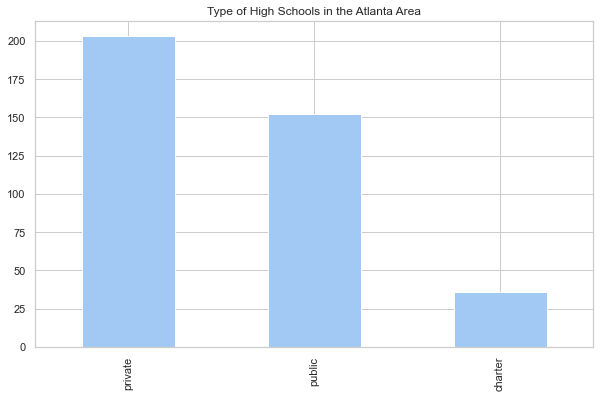

In [183]:
zipcode_schools_df['type'].value_counts().plot(kind='bar')
plt.title("Type of High Schools in the Atlanta Area")
plt.show()

In [184]:
rating_sort = cleaned_zipcode_df['rating'].sort_values(ascending=False)
rating_sort



186     9
272     9
156     9
119     9
273     8
       ..
170     2
336    10
296     1
367     1
142     1
Name: rating, Length: 94, dtype: object

In [185]:
rating = cleaned_zipcode_df['rating'].unique()
#rating

In [188]:
#fig = px.pie(round(zipcode_schools_df['rating'].value_counts(),0), names=rating, title='School Ratings')
#fig.show()


In [194]:
#'zip', 'name', 'school-summary','type', 'level-codes', 'level', 'street', 'city', 'state', 'phone',  'county', 'lat', 'lon', 'district-name', 'district-id', 'rating', 'year', 'rating-description'

df = zipcode_schools_df[['zip', 'name', 'school-summary','type', 
                         'level-codes', 'level', 'street', 'city', 
                         'state', 'phone',  'county', 'lat', 'lon', 
                         'district-name', 'district-id', 'rating', 'lat_lon']]
df.head()

,zip,name,school-summary,type,level-codes,level,street,city,state,phone,county,lat,lon,district-name,district-id,rating,lat_lon
0,30303,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,Atlanta,GA,(404) 657-0435,Fulton County,33.753963,-84.390221,Department Of Human Resources,206,None,"(33.753963, -84.390221)"
1,30303,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,GA,(844) 776-8678,Fulton,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,None,"(33.760502, -84.387169)"
2,30303,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,GA,(678) 246-9998,Fulton County,33.754742,-84.385574,Fulton County School District,73,None,"(33.754742, -84.385574)"
3,30303,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,GA,(404) 343-0064,Fulton County,33.749504,-84.392090,None,0,None,"(33.749504, -84.39209)"
5,30334,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,Atlanta,GA,(877) 512-7748,Fulton,33.749733,-84.385696,None,0,None,"(33.749733, -84.385696)"


In [195]:
atl_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [196]:
lon = df['lon'] #x
lat = df['lat'] #y
name = df['name']
lat_lon = df['lat_lon']
print(lat_lon)



0      (33.753963, -84.390221)
1      (33.760502, -84.387169)
2      (33.754742, -84.385574)
3       (33.749504, -84.39209)
5      (33.749733, -84.385696)
                ...           
388    (33.867607, -84.381737)
389    (33.865284, -84.380829)
390     (33.885662, -84.36998)
391    (33.909874, -84.426399)
392    (33.906612, -84.483704)
Name: lat_lon, Length: 391, dtype: object


In [197]:
atl_map = gpd.read_file('mygeodata/border_level8_polygon.shp')
atl_map = atl_map.to_crs("EPSG:4326")


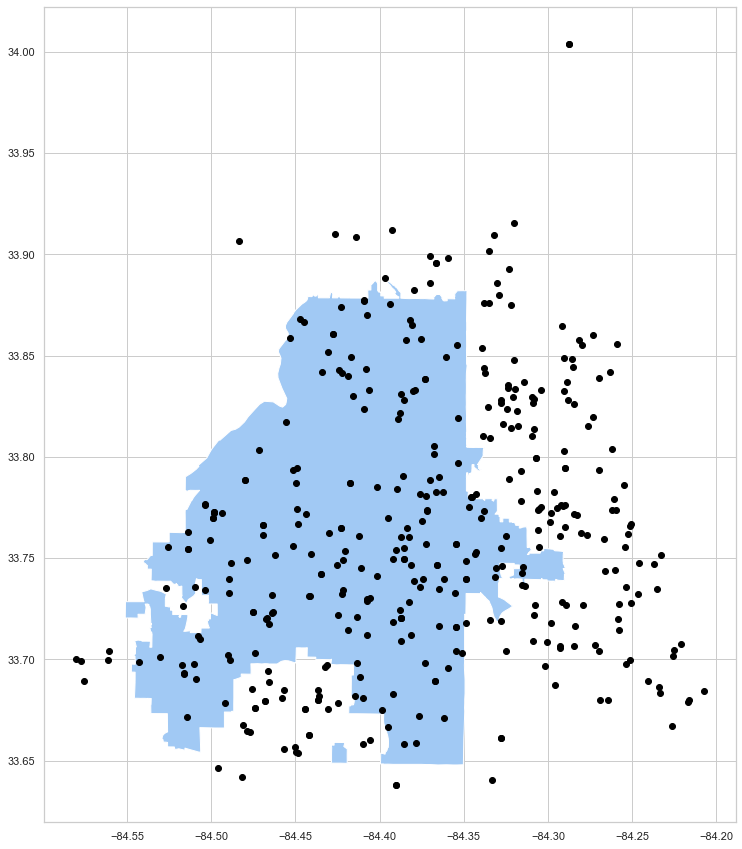

In [250]:
x_points = []
y_points = []
#multiple layers

#plot the cities polygons with no fill color
atl_map.plot(alpha=1,figsize=(15,15))
ax = atl_map.plot(ax=ax)

#loop through latitude and longitude points and parse tuple
for i in lat_lon:
    y_points.append(i[0])
    x_points.append(i[1])
    
plt.scatter(x_points, y_points,c='black')
#print(len(x_points))
#print(len(y_points))
plt.show()

264
264


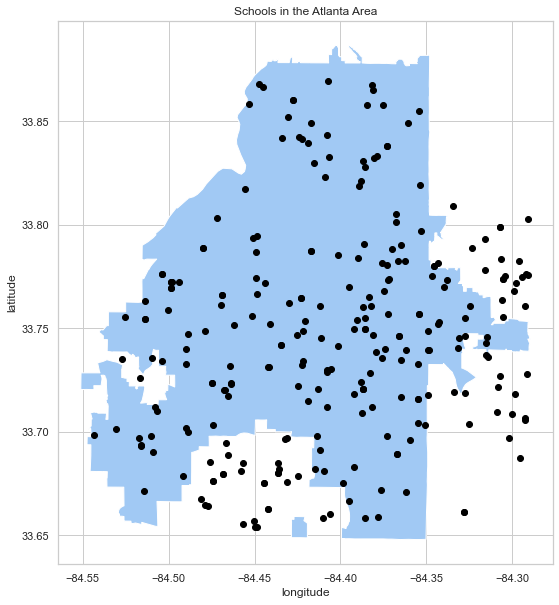

In [251]:
x_points = []
y_points = []
name = []
#multiple layers

#plot the cities polygons with no fill color
atl_map.plot(alpha=1,figsize=(10,10))
ax = atl_map.plot(ax=ax, column='name', legend=True)
for i in lat_lon:
    if i[0]>=33.87 or i[0]<=33.65:
        pass
    elif i[1]>=-84.29 or i[1]<-84.55:
        pass
    elif i[0]>=33.81 and i[1]>=-84.35:
        pass
    else:
        y_points.append(i[0])
        x_points.append(i[1])
    
schools = plt.scatter(x_points, y_points,c='black')
plt.title('Schools in the Atlanta Area');
plt.xlabel('longitude')
plt.ylabel('latitude')
print(len(x_points))
print(len(y_points))
plt.show()

In [249]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("output-data/atlanta_schools.pdf")
plt.savefig("output-data/atlanta_schools.jpg")
pp.savefig(schools, dpi = 300, transparent = True)
pp.close()

ValueError: No figure <matplotlib.collections.PathCollection object at 0x7f79f42a6220>

<Figure size 720x432 with 0 Axes>

In [116]:
# f, ax = plt.subplots(1)
# ax = atl_map.plot(ax=ax)
# ax.set_axis_off()
# plt.show()

TypeError: no numeric data to plot

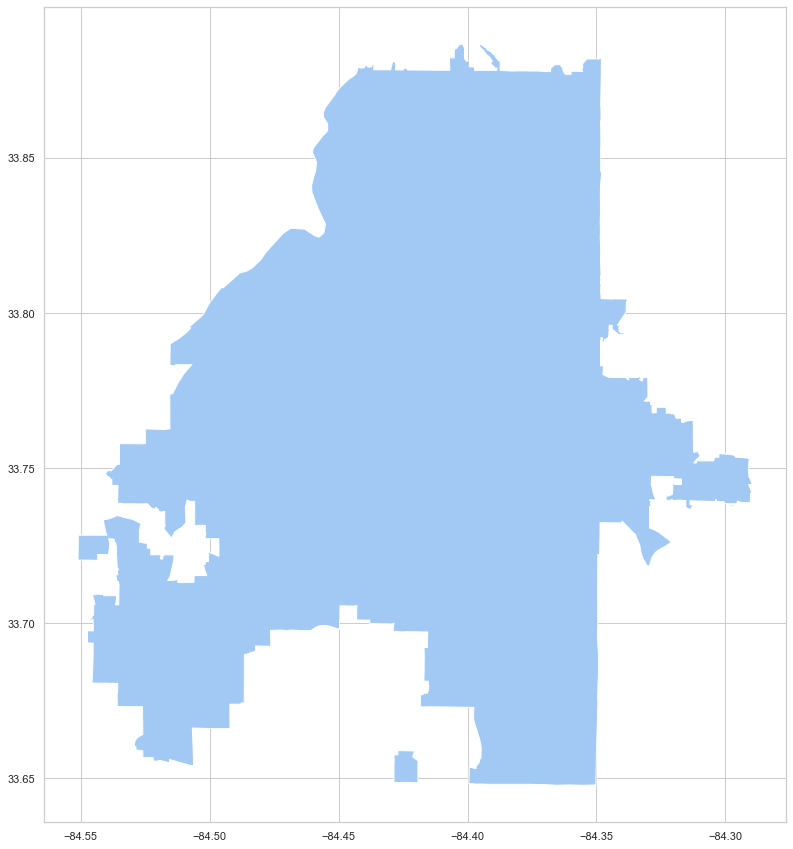

In [99]:

# Create plot
ax = l_l.plot(facecolor='gray');
atl_map.plot(ax=ax, facecolor='red');
data.plot(ax=ax, color='blue', markersize=5);
plt.tight_layout()
# for p,k in lat_lon:
#     geometry
# #     ax.plot(s)
